In [1]:
import numpy as np   # working on arrays /mathematical use
import pandas as pd  # data frame i.e tables
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape') 
#to avoid encoding error ,use unicode_escape
# df is data frame we are storing the values to df

In [4]:
df.shape
# how many rows and columns are there in this file shape will display it 

(11251, 15)

In [5]:
df.head()
# it will display the top 5 rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

# for data cleaning we use info to see the types of data available in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'], axis = 1, inplace=True)
#those cloumns are not required , drop is used to clean up from the df
#axis = 1 means the total row(vertically) of that column name specified 
#inplace = True means what all we are working now on this set will get saved

In [12]:
#need to check null values in the set which is important part of data cleaning
# isnull will give True or Flase

pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df.dropna(inplace=True)
# will delete the null values in the data frame

In [13]:
#to make data type changes
df['Amount'] = df['Amount'].astype('int')

In [14]:
#to check the data type is changed or not 
df['Amount'].dtype

dtype('int32')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
#to change any column name use 'rename'
df.rename(columns = {'Marital_Status' :'MaritalStatus'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,MaritalStatus,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [18]:
#describe() - method reurns description of the data in the dataframe (count, mean, std)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
#use describe() for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis

Gender

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

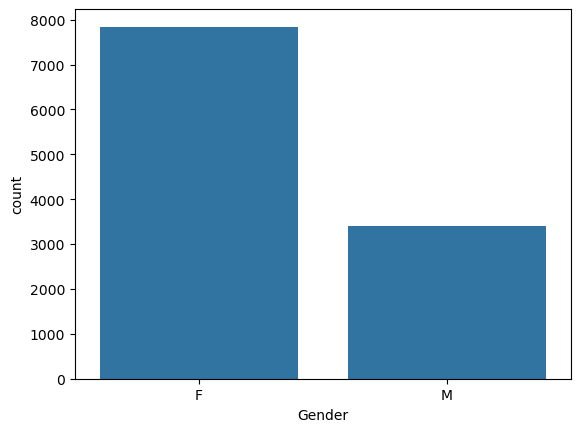

In [5]:
sns.countplot(x = 'Gender',data = df)
plt.show()

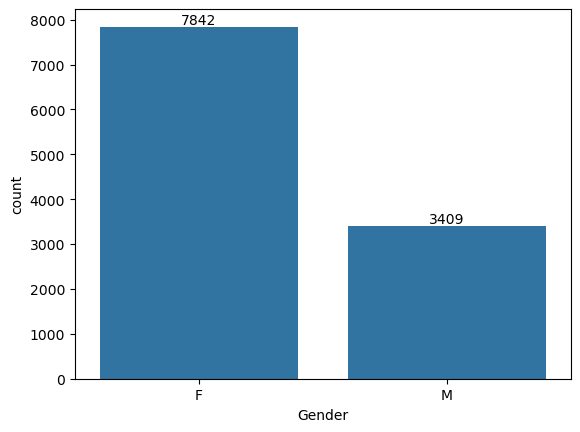

In [6]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

From this we see most of the buyers are female and the purchasing power of female is greater than mens

Age

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

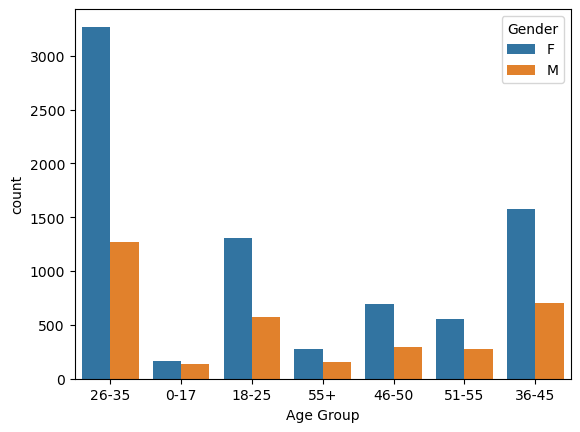

In [11]:
sns.countplot(data = df, x = 'Age Group',hue='Gender')
plt.show()

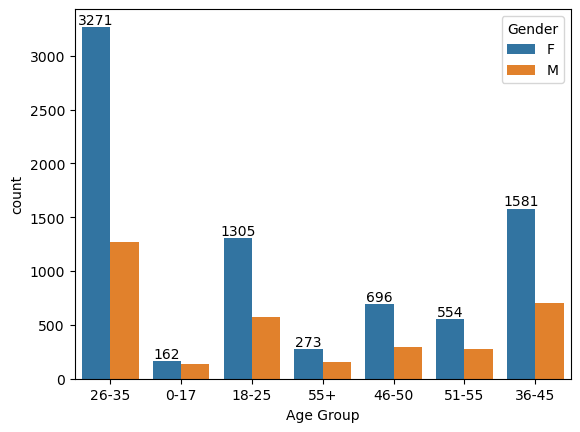

In [15]:
ax = sns.countplot(data = df, x ='Age Group',hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

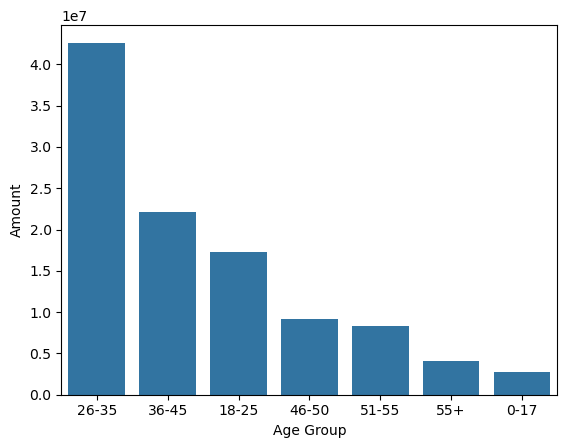

In [17]:
#total amount vs age group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount',data=sales_age)
plt.show()

from the above graph most of the buyers are of the age group 26-35 yrs and they are womens

State

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

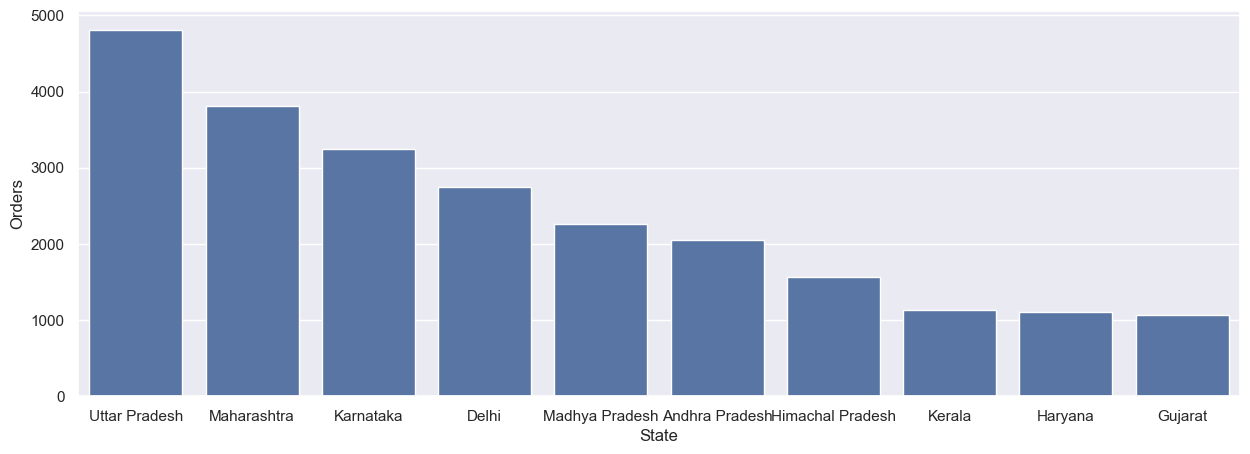

In [24]:
#total number of orders from top 10 states
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State', y='Orders')
plt.show()

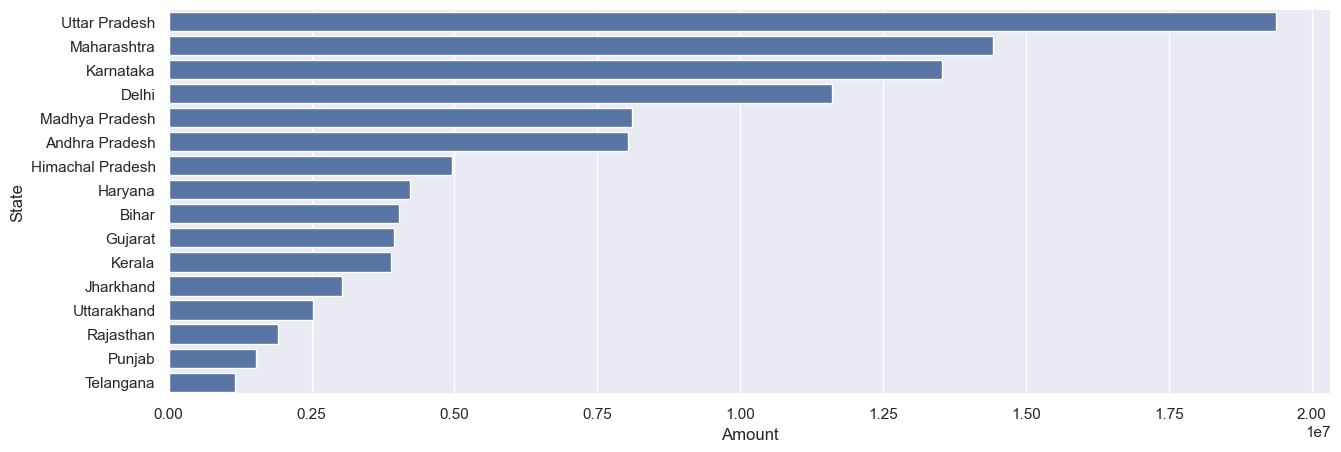

In [29]:
sales_amount = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_amount,x='Amount',y='State')
plt.show()

Most of the orders placed are from UP, Maharastar and Karnataka

Marital Status

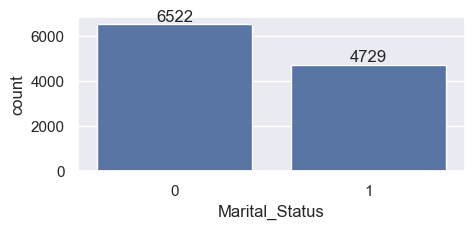

In [35]:
ax = sns.countplot(data=df, x='Marital_Status')
sns.set(rc={'figure.figsize':(5,2)})
for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

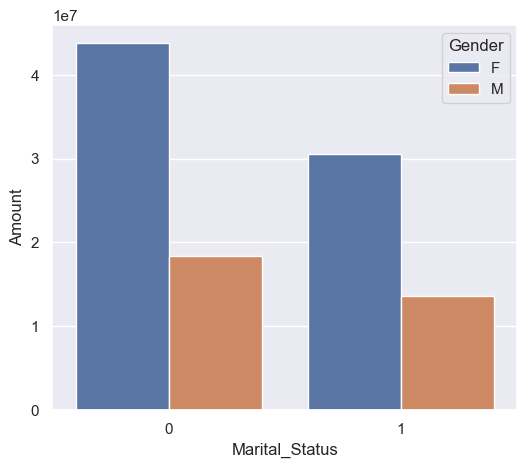

In [38]:
sales_status = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)}) 
sns.barplot(data=sales_status,x='Marital_Status',y='Amount',hue='Gender')
plt.show()

from the above married female have made more purchases than mens

<span style="color: Black;">Occupation</span>

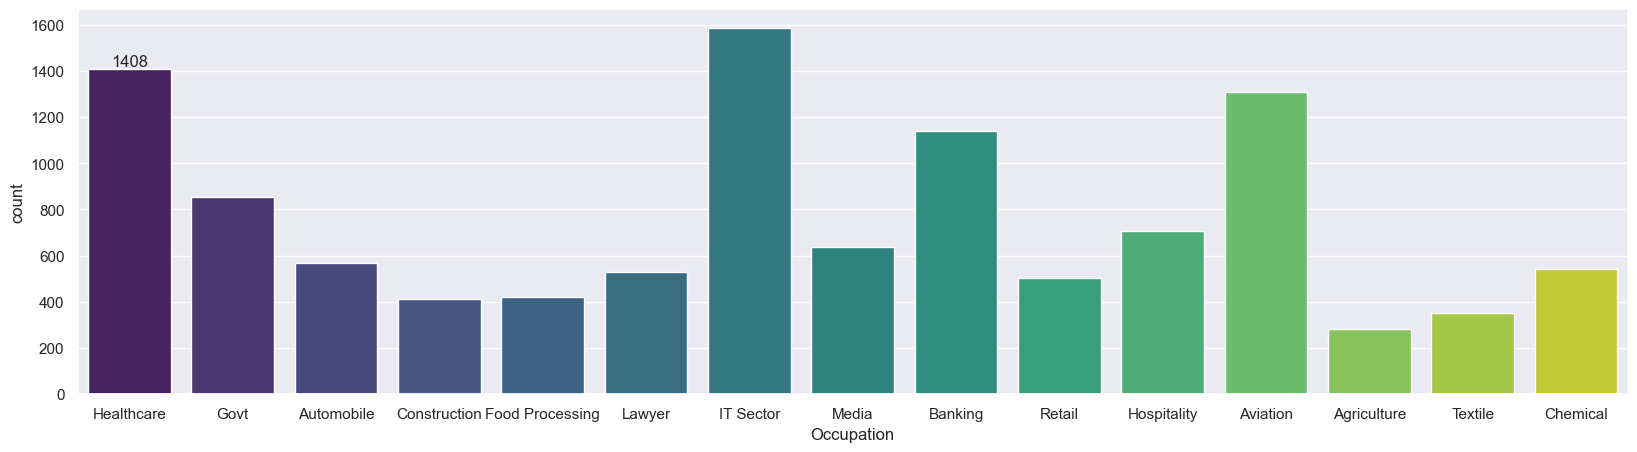

In [47]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=df,x='Occupation',palette='viridis',hue='Occupation',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

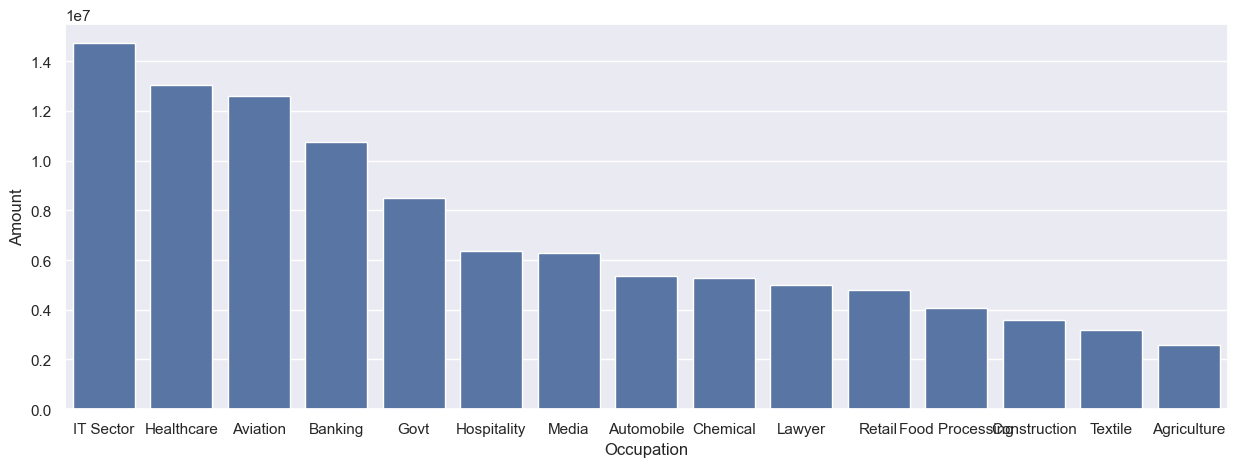

In [51]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x='Occupation',y='Amount')
plt.show()

the most of the buyers are from IT Sector, Healthcare and Aviation

Product Category

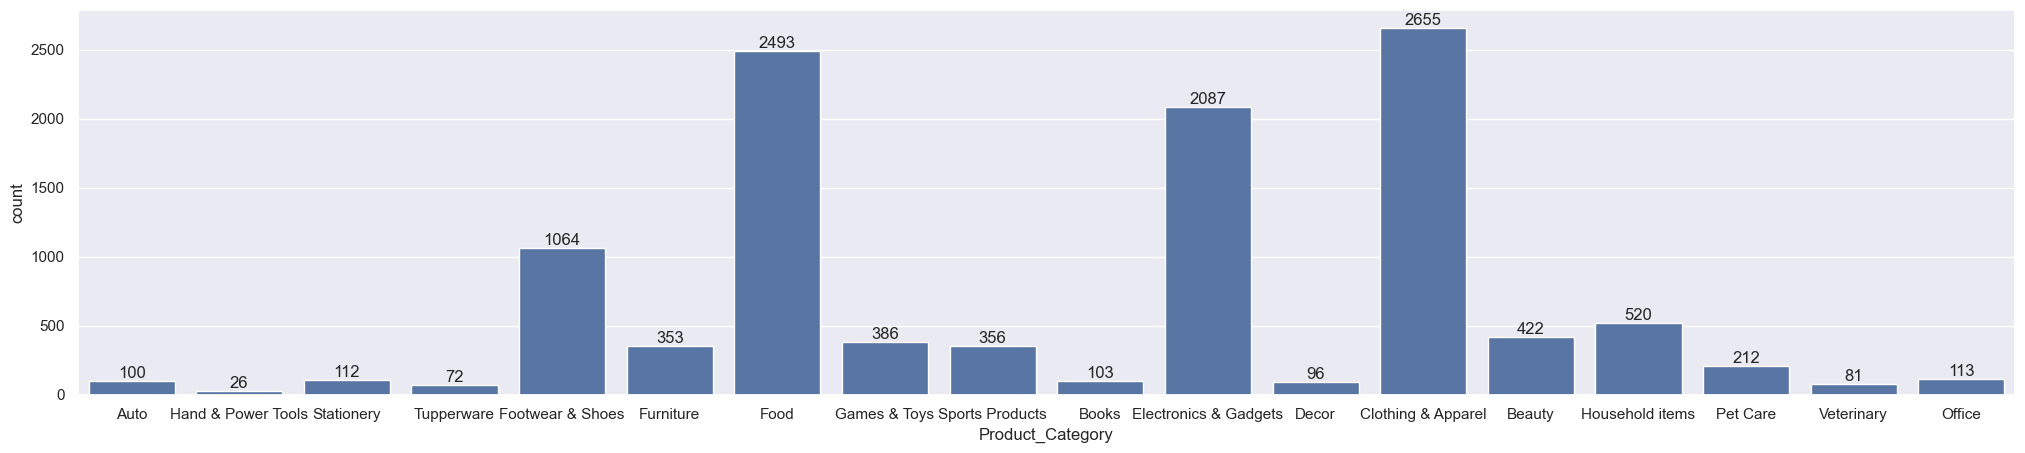

In [54]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

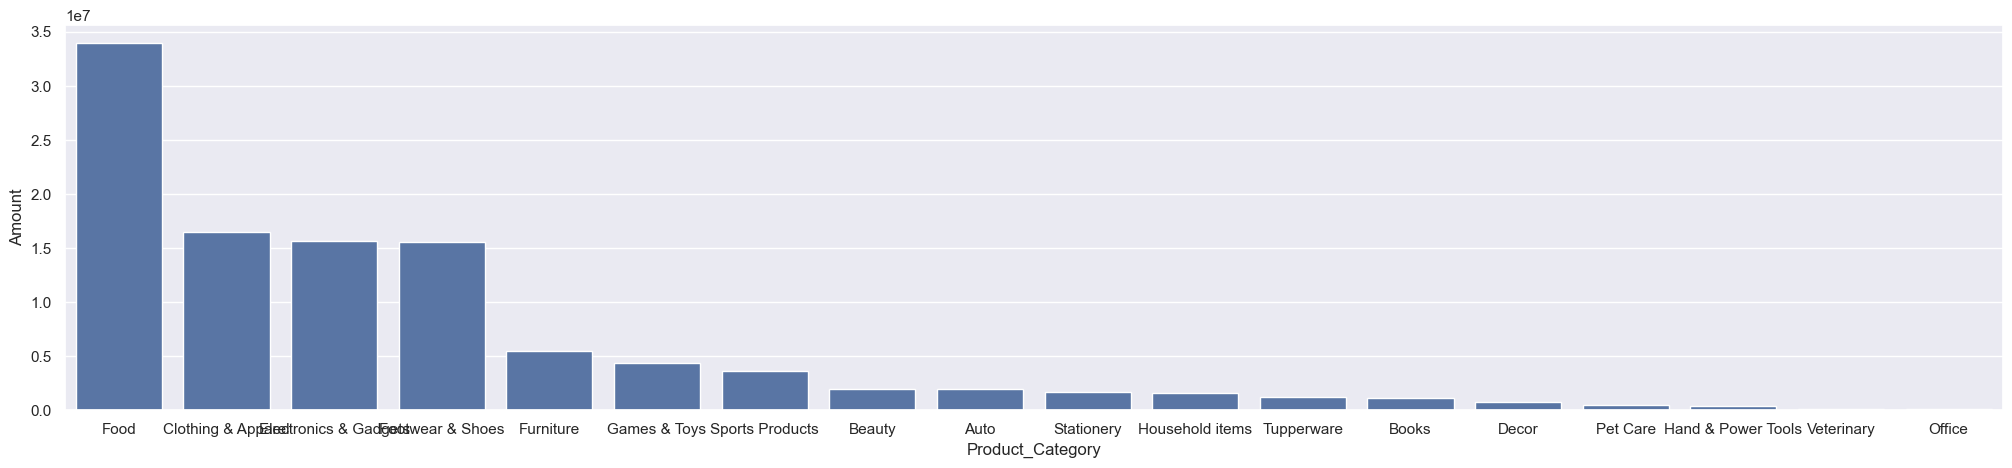

In [60]:
sales_status = df.groupby(['Product_Category'],as_index=False).sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_status, x='Product_Category', y='Amount')
plt.show()

from the above graph high revenue generated selling product are Food, Clothing&Apparel,Electronics

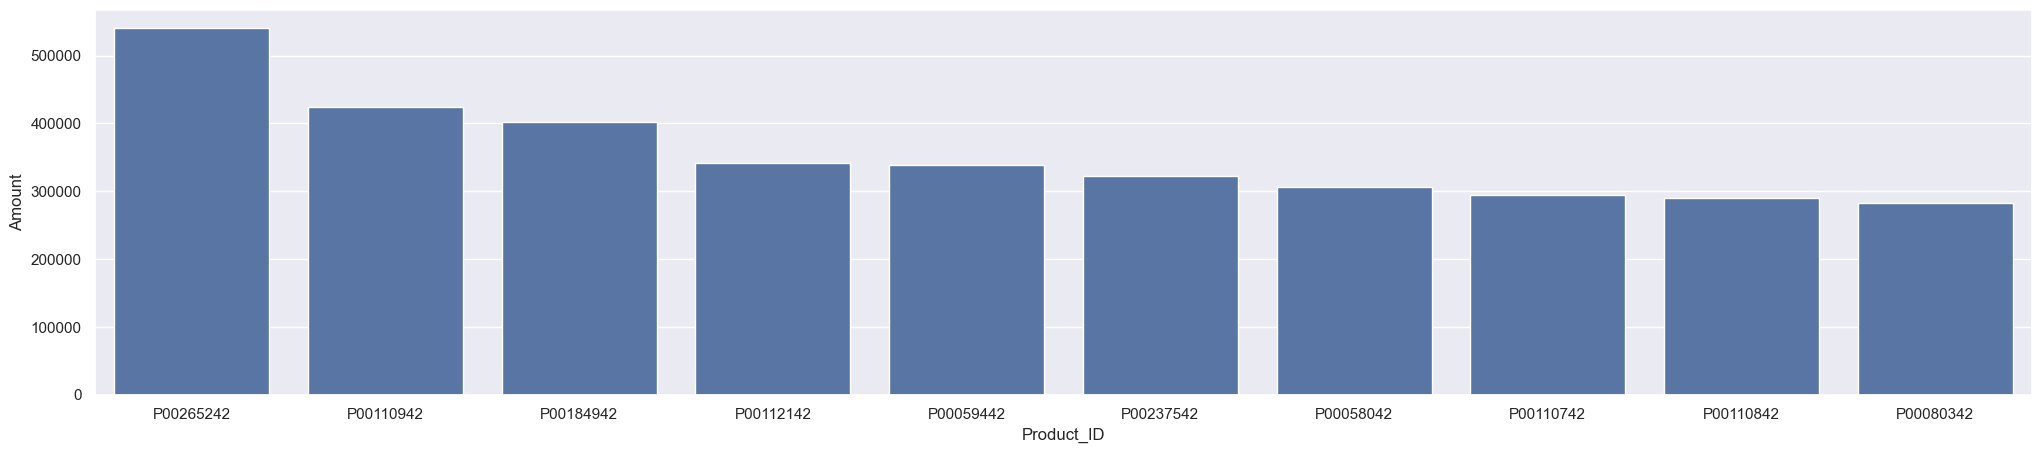

In [64]:
sales_status = df.groupby(['Product_ID'],as_index=False).sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_status,x='Product_ID',y='Amount')
plt.show()

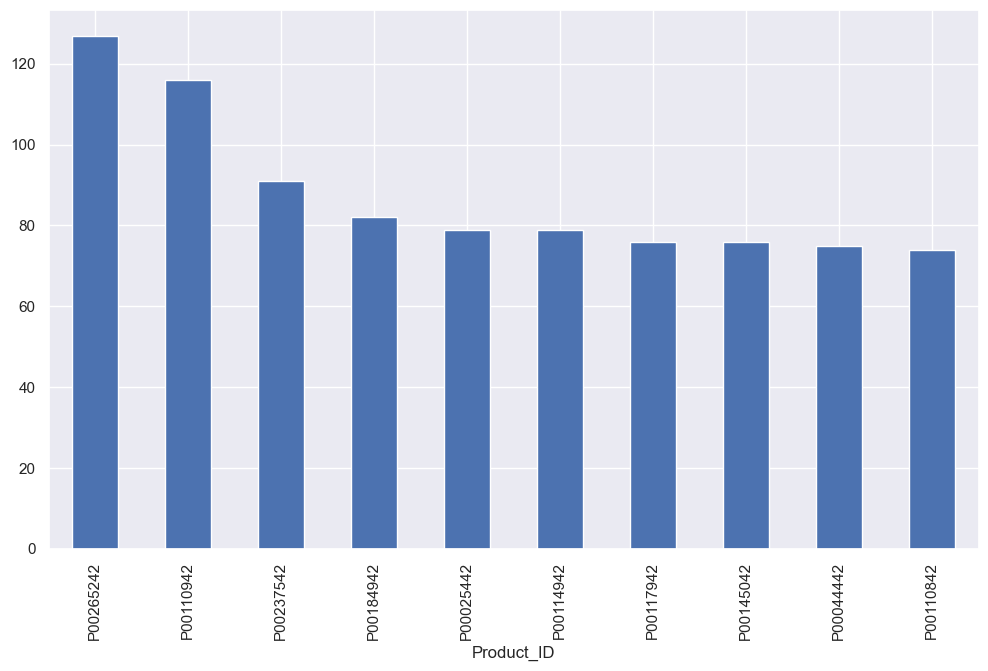

In [66]:
fig1,ax1=plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

Conclusion : Married Women of age group 26-25 yrs from UP, Mahara
stra and Karnataka working in IT,Healthcare, Aviator sector 
mostly buy products Food, Apparel&Clothing, Electronics gradgets.